In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import pyrex
#import pyrex.custom.ara as ara
from pyrex.internal_functions import normalize
import os
import sys
import seaborn as sns
import polReco_util as util
import scipy

import ROOT
from ROOT import TCanvas, TGraph
from ROOT import gROOT
from ROOT import gInterpreter, gSystem
from ROOT import TChain, TSelector, TTree
from scipy.stats import norm
from scipy.stats import rayleigh

#add headers from AraSim. Not sure if all of them are needed, and I'm lazy to check that. MAK SURE to change the location of the headers
# gInterpreter.ProcessLine('#include "/cvmfs/ara.opensciencegrid.org/trunk/centos7/source/AraSim/Position.h"')
# gInterpreter.ProcessLine('#include "/cvmfs/ara.opensciencegrid.org/trunk/centos7/source/AraSim/Report.h"')
# gInterpreter.ProcessLine('#include "/cvmfs/ara.opensciencegrid.org/trunk/centos7/source/AraSim/Detector.h"')
# gInterpreter.ProcessLine('#include "/cvmfs/ara.opensciencegrid.org/trunk/centos7/source/AraSim/Settings.h"')
# gInterpreter.ProcessLine('#include "/cvmfs/ara.opensciencegrid.org/trunk/centos7/source/AraSim/EarthModel.h"')
# gInterpreter.ProcessLine('#include "/cvmfs/ara.opensciencegrid.org/trunk/centos7/source/AraSim/Event.h"')
# gInterpreter.ProcessLine('#include "/cvmfs/ara.opensciencegrid.org/trunk/centos7/source/AraSim/Spectra.h"')
# gInterpreter.ProcessLine('#include "/cvmfs/ara.opensciencegrid.org/trunk/centos7/source/AraSim/Interaction.h"')


gInterpreter.ProcessLine('#include "/cvmfs/ara.opensciencegrid.org/trunk/centos7/source/libRootFftwWrapper/include/FFTtools.h"')


# gSystem.Load('/cvmfs/ara.opensciencegrid.org/trunk/centos7/source/AraSim/libAra.so') #load the simulation event library. You might get an error asking for the eventSim dictionry. To solve that, go to where you compiled AraSim, find that file, and copy it to where you set LD_LIBRARY_PATH.
# gSystem.Load('/cvmfs/ara.opensciencegrid.org/trunk/centos7/ara_build/lib/libAraEvent.so')
gSystem.Load('/users/PAS0654/jflaherty13/source/AraRoot/AraRoot_build/lib/libAraEvent.so')
gSystem.Load("/cvmfs/ara.opensciencegrid.org/trunk/centos7/source/libRootFftwWrapper/build/libRootFftwWrapper.so")

gInterpreter.ProcessLine('#include "/users/PAS0654/jflaherty13/source/AraSim/Position.h"')
gInterpreter.ProcessLine('#include "/users/PAS0654/jflaherty13/source/AraSim/Report.h"')
gInterpreter.ProcessLine('#include "/users/PAS0654/jflaherty13/source/AraSim/Detector.h"')
gInterpreter.ProcessLine('#include "/users/PAS0654/jflaherty13/source/AraSim/Settings.h"')
gInterpreter.ProcessLine('#include "/users/PAS0654/jflaherty13/source/AraSim/IceModel.h"')
gInterpreter.ProcessLine('#include "/users/PAS0654/jflaherty13/source/AraSim/EarthModel.h"')
gInterpreter.ProcessLine('#include "/users/PAS0654/jflaherty13/source/AraSim/Event.h"')
gInterpreter.ProcessLine('#include "/users/PAS0654/jflaherty13/source/AraSim/Spectra.h"')
# gInterpreter.ProcessLine('#include "/users/PAS0654/jflaherty13/source/AraSim/Interaction.h"')

# sys.path.append("/cvmfs/ara.opensciencegrid.org/trunk/centos7/source/ARA_cvmfs/root_build/lib/") # go to parent dir
#sys.path.append("/users/PCON0003/cond0068/.local/lib/python3.7/site-packages/")  #I don't have access to this directory in Jorge's account
#sys.path.append("/users/PAS0654/jflaherty13/.local/lib/python3.9/site-packages/")
# sys.path.append("/users/PCON0003/cond0068/pyrex_sims/fromBen/thesis_work/pyrex-custom/analysis/custom/analysis/")
# import ROOT
# import math
# from ROOT import TH1D,TF1, gRandom, gPad, gStyle
#import matplotlib as mpl
#import matplotlib.pyplot as plt
# from ROOT import TChain, TSelector, TTree
#import itertools

# mpl.use('agg') 
mpl.rcParams['text.usetex'] = True
#mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}'] #for \text command
#mpl.rcParams['text.latex.unicode'] = True
mpl.rcParams['mathtext.rm'] = 'Times New Roman'
mpl.rcParams['mathtext.it'] = 'Times New Roman:italic'
mpl.rcParams['mathtext.bf'] = 'Times New Roman:bold'

mpl.rc('font', family='serif', size=12)
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['ytick.major.size'] = 5

mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 18
mpl.rc('font', size=16)
mpl.rc('axes', titlesize=20)

# import mplcyberpunk
# plt.style.use("cyberpunk")

#current_palette = sns.color_palette('colorblind', 10)
current_palette = sns.color_palette('bright', 10)

/cvmfs/ara.opensciencegrid.org/trunk/centos7/root_build/lib/cppyy/__init__.py:72: DeprecationWarning: invalid escape sequence \d
  if re.match('^libcppyy_backend\d_\d$', lib_name):


Welcome to JupyROOT 6.22/06


Warning in <TClassTable::Add>: class FFTtools::AnalyticSignal already in TClassTable
Warning in <TClassTable::Add>: class FFTtools::CompositeSignal already in TClassTable
Warning in <TClassTable::Add>: class FFTtools::BandlimitedSampledSignal already in TClassTable
Warning in <TClassTable::Add>: class FFTtools::ThermalNoise already in TClassTable
Warning in <TClassTable::Add>: class FFTtools::Averager already in TClassTable
Warning in <TClassTable::Add>: class FFTtools::CWT already in TClassTable
Warning in <TClassTable::Add>: class FFTtools::CWT::MotherWavelet already in TClassTable
Warning in <TClassTable::Add>: class FFTtools::CWT::Ricker already in TClassTable
Warning in <TClassTable::Add>: class FFTtools::CWT::Ridger already in TClassTable
Warning in <TClassTable::Add>: class FFTtools::CWT::Morlet already in TClassTable
Warning in <TClassTable::Add>: class FFTtools::DigitalFilter already in TClassTable
Warning in <TClassTable::Add>: class FFTtools::DigitalFilterSeries already in T

In [2]:
stationID = 2 #2
runNumber = 1000 #12557
subsetNumber = '' #102

rawSrcFolder = "/fs/scratch/PAS0654/SPICE_birefringence_A2/AraOut.setup_variablePsi="+str(runNumber)+".txt.run"+str(runNumber)+".root"
recoSrcFolder = "/fs/scratch/PAS0654/SPICE_birefringence_A2_interferometry/recangle_reco_out_run_"+str(runNumber)+".root"

deconvolvedFilename = "/fs/scratch/PAS0654/SPICE_birefringence_A2_deconvolution/150to300/deconvolvedWaveforms_run_"+str(runNumber)+".root"



dataTypeFlag = 1
signalTypeFlag = 0
noiseTypeFlag = 0
gainBalance = 0
deconvolution = False

rawFilename = rawSrcFolder
recoFilename = recoSrcFolder

In [3]:
if (dataTypeFlag == 0):
    rawInputFile = ROOT.TFile.Open(rawFilename)
    recoInputFile = ROOT.TFile.Open(recoFilename)

    eventTree = rawInputFile.Get("eventTree")
    vertexReco = recoInputFile.Get("vertexReco")

    rawEvent = ROOT.RawAtriStationEvent()
    eventTree.SetBranchAddress("event",ROOT.AddressOf(rawEvent))

    totalRawEvents = eventTree.GetEntries()
    print('total raw events:', totalRawEvents)

    totalRecoEvents = vertexReco.GetEntries()
    print('total reco events:', totalRecoEvents)
    
elif (dataTypeFlag==1):
    rawInputFile = ROOT.TFile.Open(rawFilename)
    recoInputFile = ROOT.TFile.Open(recoFilename)
    
    # eventTree = rawInputFile.Get("eventTree")
    # simTree = rawInputFile.Get("AraTree2")
    
    file_list = []
    file_list.append(rawFilename)
    
    eventTree = TChain("eventTree") #Define chain and tree that needs to be read. "VTree" in this case.
    simSettingsTree = TChain("AraTree")
    simTree = TChain("AraTree2")
    vertexReco = recoInputFile.Get("vertexReco")

    for line in file_list:
        eventTree.AddFile(line)
        simTree.AddFile(line)
        simSettingsTree.AddFile(line)
        
    reportPtr = ROOT.Report()#report pointer
    eventPtr = ROOT.Event()
    detectorPtr = ROOT.Detector()
    interactionPtr = ROOT.Interaction()
    stationPtr = ROOT.ARA_station()

    usefulEvent = ROOT.UsefulAtriStationEvent()
    rawEvent = ROOT.RawAtriStationEvent()
    eventTree.SetBranchAddress("UsefulAtriStationEvent",ROOT.AddressOf(usefulEvent))
    eventTree.SetBranchAddress("RawAtriStationEvent",ROOT.AddressOf(rawEvent))
    simTree.SetBranchAddress("report",ROOT.AddressOf(reportPtr))
    simTree.SetBranchAddress("event", ROOT.AddressOf(eventPtr))
    simTree.SetBranchAddress("Nu_Interaction", ROOT.AddressOf(interactionPtr))
    simSettingsTree.SetBranchAddress("detector", ROOT.AddressOf(detectorPtr))
    simSettingsTree.SetBranchAddress("stations", ROOT.AddressOf(stationPtr))
    simSettingsTree.GetEntry(0)

    totalRawEvents = eventTree.GetEntries()
    print('total raw events:', totalRawEvents) 
    
    totalRecoEvents = vertexReco.GetEntries()
    print('total reco events:', totalRecoEvents)
    
if (totalRecoEvents != totalRawEvents):
    print("ERROR: Raw event file and reconstructed event file have different number of events! Ensure that you are using compatible files!")
    sys.exit
    

total raw events: 100
total reco events: 100


In [4]:
#Test importing deconvolvedWaveform file

# deconvolvedFilename = "/users/PAS0654/jflaherty13/source/AraSim/outputs/test/deconvolution/deconvolvedWaveforms_run_45.root"
# deconvolvedFilename = "/users/PAS0654/jflaherty13/source/AraSim/outputs/20230710_pulserSims_1000m/deconvolution/deconvolvedWaveforms_run_"+str(runNumber)+".root"

deconvolvedFile = ROOT.TFile.Open(deconvolvedFilename)

# eventTree = rawInputFile.Get("eventTree")
# simTree = rawInputFile.Get("AraTree2")

file_list = []
file_list.append(deconvolvedFilename)

eventTree2 = TChain("eventTree") #Define chain and tree that needs to be read. "VTree" in this case.
# simSettingsTree = TChain("AraTree")
# simTree = TChain("AraTree2")
# vertexReco = recoInputFile.Get("vertexReco")

for line in file_list:
    eventTree2.AddFile(line)
    # simTree.AddFile(line)
    # simSettingsTree.AddFile(line)

# reportPtr = ROOT.Report()#report pointer
eventPtr2 = ROOT.Event()
# detectorPtr = ROOT.Detector()
# interactionPtr = ROOT.Interaction()
# stationPtr = ROOT.ARA_station()

usefulEvent2 = ROOT.UsefulAtriStationEvent()
# rawEvent = ROOT.RawAtriStationEvent()
eventTree2.SetBranchAddress("UsefulAtriStationEvent",ROOT.AddressOf(usefulEvent2))
# eventTree.SetBranchAddress("RawAtriStationEvent",ROOT.AddressOf(rawEvent))
# simTree.SetBranchAddress("report",ROOT.AddressOf(reportPtr))
# simTree.SetBranchAddress("event", ROOT.AddressOf(eventPtr))
# simTree.SetBranchAddress("Nu_Interaction", ROOT.AddressOf(interactionPtr))
# simSettingsTree.SetBranchAddress("detector", ROOT.AddressOf(detectorPtr))
# simSettingsTree.SetBranchAddress("stations", ROOT.AddressOf(stationPtr))
# simSettingsTree.GetEntry(0)

totalRawEvents = eventTree2.GetEntries()
# print('total raw events:', totalRawEvents) 

# totalRecoEvents = vertexReco.GetEntries()
# print('total reco events:', totalRecoEvents)

# if (totalRecoEvents != totalRawEvents):
# print("ERROR: Raw event file and reconstructed event file have different number of events! Ensure that you are using compatible files!")
# sys.exit
print(totalRawEvents)

100


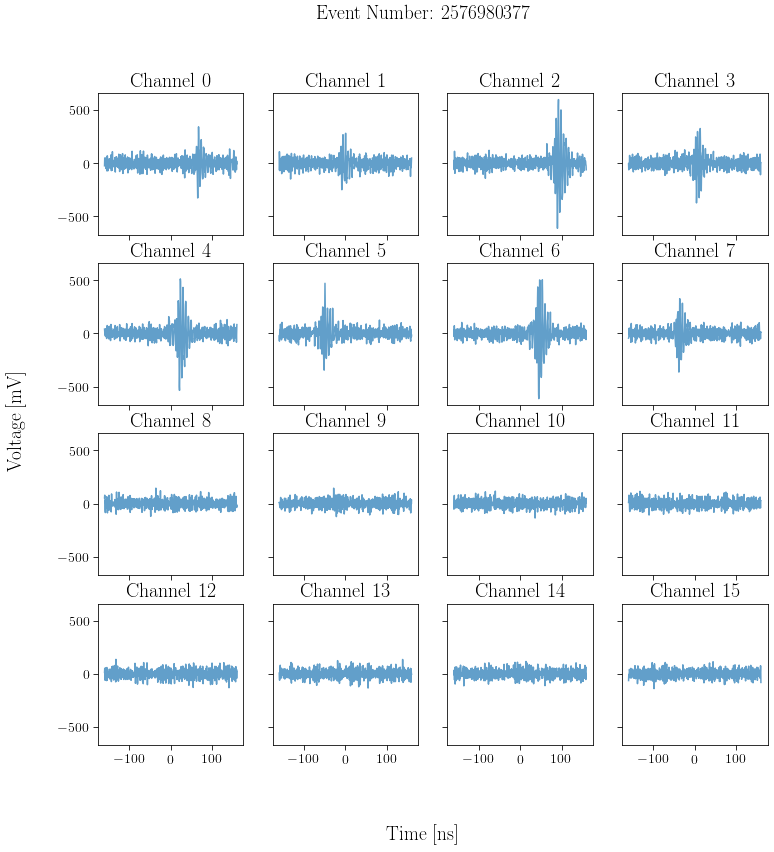

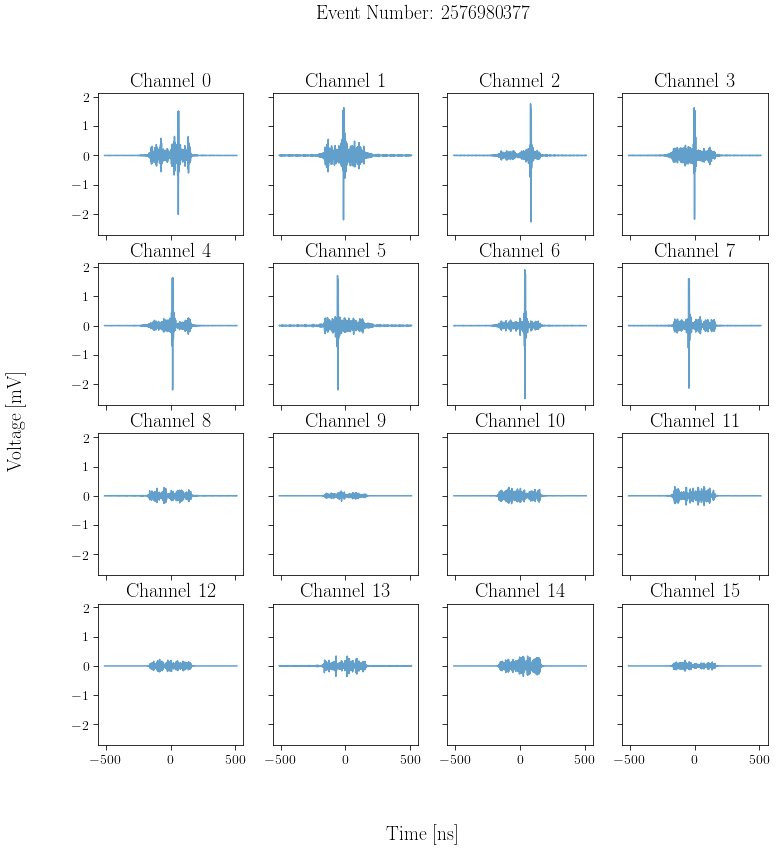

***NOTE***: Year/Unixtime argument is 0. If you want the correct channel mappings for ARA03 & ARA01 for 2018 & after please specify either: 
a) The right year when you call AraGeomTool::getStationInfo(3,2017) where 3 is stationID and 2017 is DB year
b) The Unixtime of any event at the chosen run when you call AraGeomTool::getStationInfo(3,1000000000) where 3 is stationID and 1000000000 is unixtime
OR
c) Call UsefulAtriStationEvent *realAtriEvPtr = new UsefulAtriStationEvent(rawAtriEvPtr, AraCalType::kLatestCalib); ***BEFORE*** 
AraGeomTool::getStationInfo(3,2017)
Opening 2013-2017 SQliteDB using AraGeomTool::getStationInfo()
Opening default 2013-2017 SQLite tables for all stations 


In [5]:
evt=0
eventTree.GetEntry(evt)
# usefulEvent = ROOT.UsefulAtriStationEvent(rawEvent,ROOT.AraCalType.kLatestCalib)
util.plotDeconvolvedWaveform(usefulEvent, vertexReco, deconvolution=False)
plt.show()
# evt=0
eventTree2.GetEntry(evt)
util.plotDeconvolvedWaveform(usefulEvent2, vertexReco, deconvolution=False)
plt.show()

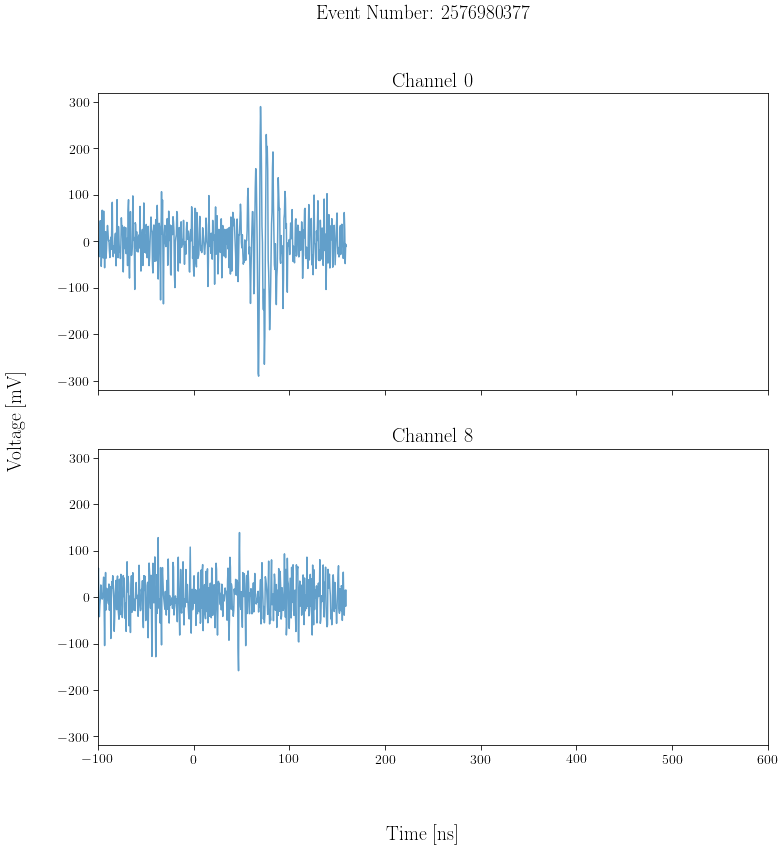

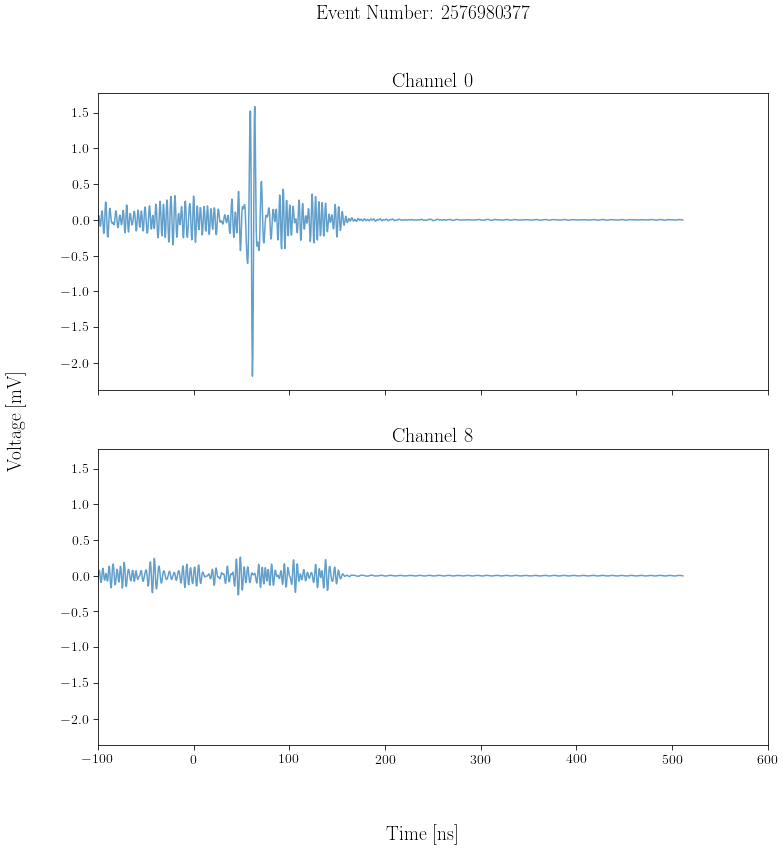

In [6]:
evt=19
channelPair=0
eventTree.GetEntry(evt)
# usefulEvent = ROOT.UsefulAtriStationEvent(rawEvent,ROOT.AraCalType.kLatestCalib)
util.plotDeconvolvedWaveform(usefulEvent, vertexReco, deconvolution=False, channelPair=channelPair)
plt.xlim([-100,600])
plt.show()
# evt=0
eventTree2.GetEntry(evt)
util.plotDeconvolvedWaveform(usefulEvent2, vertexReco, deconvolution=False, channelPair=channelPair)
plt.xlim([-100,600])
plt.show()

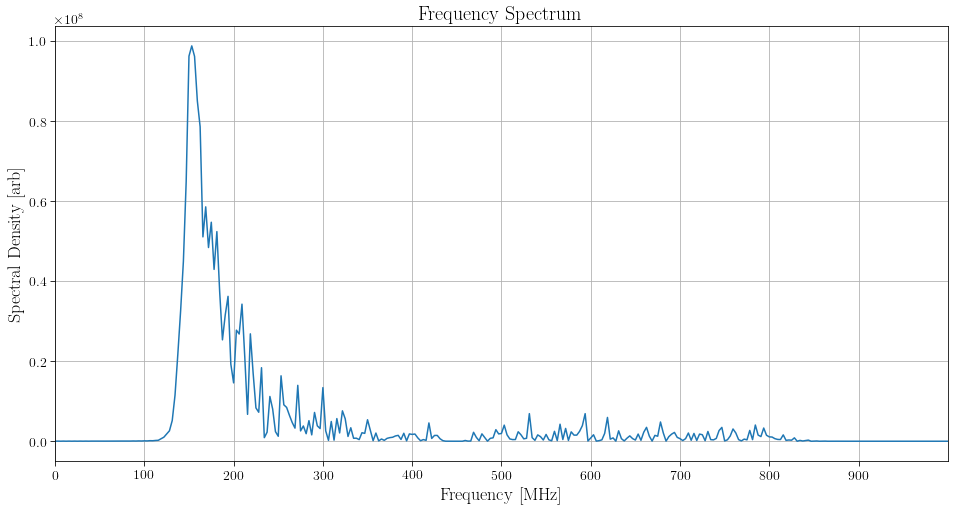

In [7]:
# Do fft of waveform to see what we should set bandpass to.
ch = 0
volts = np.array(usefulEvent.fVolts[ch])
times = np.array(usefulEvent.fTimes[ch])
fft, freq, dT = util.doFFT(times, volts)
psd = np.abs(fft**2)
fig = plt.figure(figsize=(16,8))
plt.plot(freq,psd)
plt.title("Frequency Spectrum")
plt.xlabel("Frequency [MHz]")
plt.ylabel("Spectral Density [arb]")
plt.xticks(np.arange(0,1000,100))
plt.xlim([0,1000])
plt.grid()


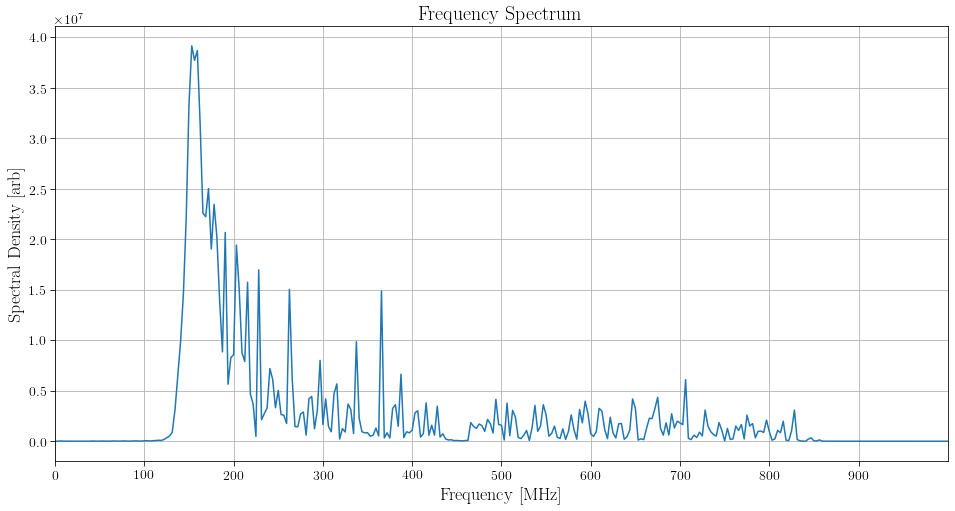

In [8]:
# Do fft of waveform to see what we should set bandpass to.
ch = 8
volts = np.array(usefulEvent.fVolts[ch])
times = np.array(usefulEvent.fTimes[ch])
fft, freq, dT = util.doFFT(times, volts)
psd = np.abs(fft**2)
fig = plt.figure(figsize=(16,8))
plt.plot(freq,psd)
plt.title("Frequency Spectrum")
plt.xlabel("Frequency [MHz]")
plt.ylabel("Spectral Density [arb]")
plt.xticks(np.arange(0,1000,100))
plt.xlim([0,1000])
plt.grid()


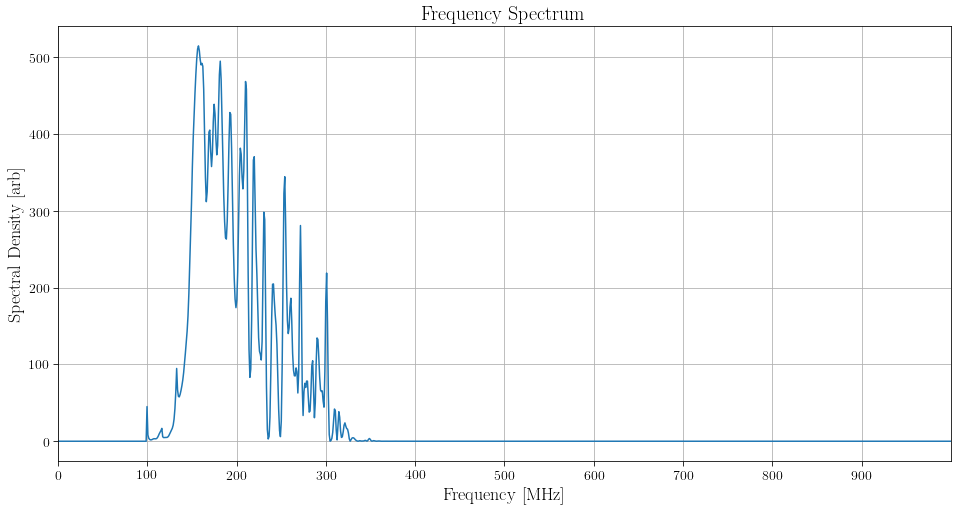

In [9]:
# Do fft of waveform to see what we should set bandpass to.
ch = 0
volts = np.array(usefulEvent2.fVolts[ch])
times = np.array(usefulEvent2.fTimes[ch])
fft, freq, dT = util.doFFT(times, volts)
psd = np.abs(fft**2)
fig = plt.figure(figsize=(16,8))
plt.plot(freq,psd)
plt.title("Frequency Spectrum")
plt.xlabel("Frequency [MHz]")
plt.ylabel("Spectral Density [arb]")
plt.xticks(np.arange(0,1000,100))
plt.xlim([0,1000])
plt.grid()

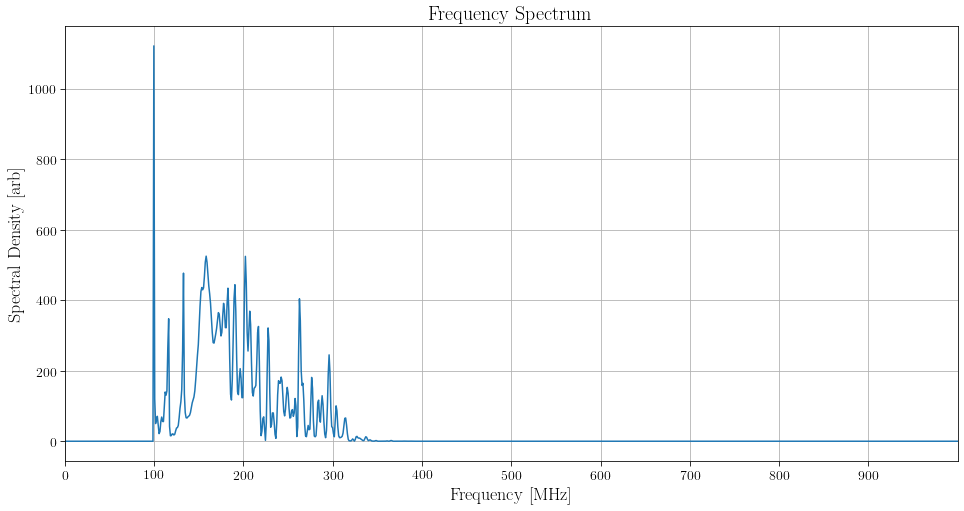

In [10]:
# Do fft of waveform to see what we should set bandpass to.
ch = 8
volts = np.array(usefulEvent2.fVolts[ch])
times = np.array(usefulEvent2.fTimes[ch])
fft, freq, dT = util.doFFT(times, volts)
psd = np.abs(fft**2)
fig = plt.figure(figsize=(16,8))
plt.plot(freq,psd)
plt.title("Frequency Spectrum")
plt.xlabel("Frequency [MHz]")
plt.ylabel("Spectral Density [arb]")
plt.xticks(np.arange(0,1000,100))
plt.xlim([0,1000])
plt.grid()


In [11]:
# evt=13
# eventTree.GetEntry(evt)
# usefulEvent = ROOT.UsefulAtriStationEvent(rawEvent,ROOT.AraCalType.kLatestCalib)
# util.plotDeconvolvedWaveform(usefulEvent, vertexReco, deconvolution=False)
# plt.show()
# # evt=14
# eventTree2.GetEntry(evt)
# util.plotDeconvolvedWaveform(usefulEvent2, vertexReco, deconvolution=False)
# plt.show()

In [12]:
# for evt in range(64):
#     eventTree2.GetEntry(evt)
#     # usefulEvent2 = ROOT.UsefulAtriStationEvent(rawEvent2,ROOT.AraCalType.kLatestCalib)
#     util.plotDeconvolvedWaveform(usefulEvent2, vertexReco, deconvolution=False)
#     plt.show()

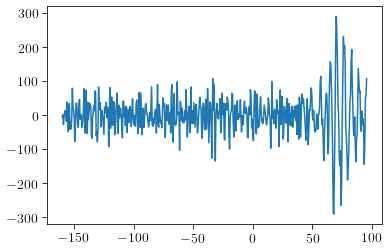

In [13]:
evt=19
ch=0
eventTree.GetEntry(evt)
# usefulEvent = ROOT.UsefulAtriStationEvent(rawEvent,ROOT.AraCalType.kLatestCalib)
voltage, time = util.extractChannelWaveform(usefulEvent,ch)
NFOUR=1024
cutoff=512
plt.plot(time[:cutoff],voltage[:cutoff])




# util.plotDeconvolvedWaveform(usefulEvent, vertexReco, deconvolution=False, channelPair=channelPair)
# plt.show()
# evt=0
# eventTree2.GetEntry(evt)
# util.plotDeconvolvedWaveform(usefulEvent2, vertexReco, deconvolution=False, channelPair=channelPair)
# # plt.xlim([0,900])
# plt.show()

In [14]:
usefulEvent2.isCalpulserEvent()

False

In [15]:
usefulEvent.isSoftwareTrigger()

True

In [16]:
usefulEvent2.unixTime

11068046444225730969

In [17]:
usefulEvent.unixTime

11068046444225730969

In [18]:
usefulEvent.isTrigType(2)

True

True
False
True
False


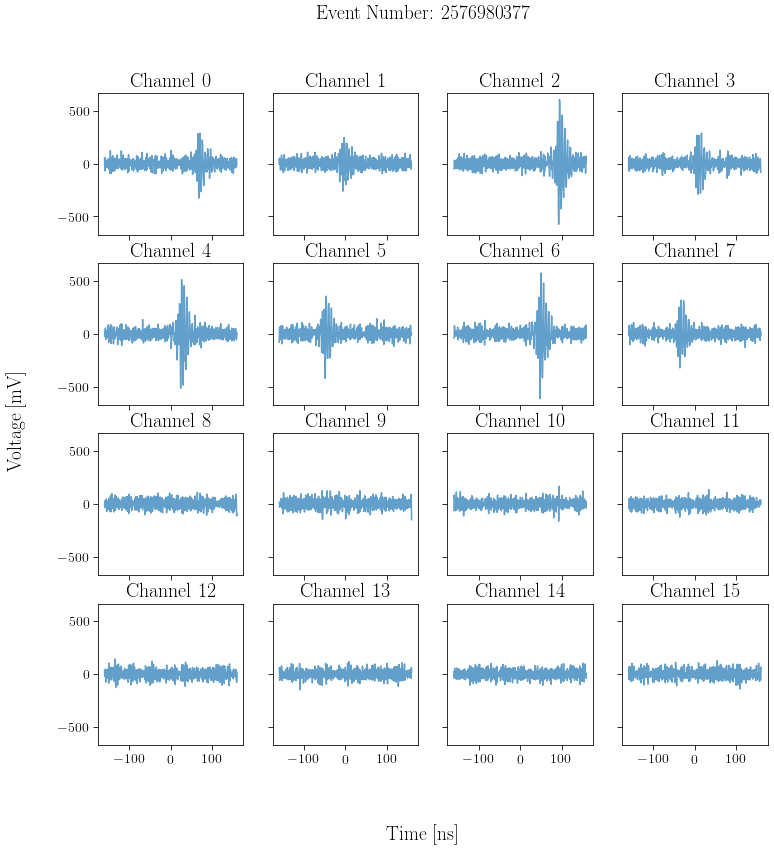

In [19]:
#Looking for calpulser event and checking its tag
evt=12
eventTree.GetEntry(evt)
eventTree2.GetEntry(evt)
# usefulEvent = ROOT.UsefulAtriStationEvent(rawEvent,ROOT.AraCalType.kLatestCalib)
print(usefulEvent.isSoftwareTrigger())
print(usefulEvent.isCalpulserEvent())
print(usefulEvent2.isSoftwareTrigger())
print(usefulEvent2.isCalpulserEvent())
util.plotDeconvolvedWaveform(usefulEvent, vertexReco, deconvolution=False)
plt.show()
# evt=0
# eventTree2.GetEntry(evt)
# util.plotDeconvolvedWaveform(usefulEvent2, vertexReco, deconvolution=False)
# plt.show()

In [20]:
usefulEvent.timeStamp

2576980377

In [21]:
usefulEvent2.timeStamp

2576980377

In [22]:
# print(usefulEvent.isTrigType(0))
# print(usefulEvent.isTrigType(1))
# print(usefulEvent.isTrigType(2))

In [23]:
# print(usefulEvent2.isTrigType(0))
# print(usefulEvent2.isTrigType(1))
# print(usefulEvent2.isTrigType(2))

In [24]:
# np.array(usefulEvent.triggerInfo)

In [25]:
# np.array(usefulEvent2.triggerInfo)

In [26]:
numEntries = eventTree2.GetEntries()
for evt in range(numEntries):
    eventTree2.GetEntry(evt)
    if (usefulEvent2.isCalpulserEvent()):
        print("Event " + str(evt) + " is a calpulser")
    elif (usefulEvent2.isSoftwareTrigger()):
        print("Event " + str(evt) + " is a soft trigger")
    else:
        print("Event " + str(evt) + " is a RF event.")

Event 0 is a soft trigger
Event 1 is a soft trigger
Event 2 is a soft trigger
Event 3 is a soft trigger
Event 4 is a soft trigger
Event 5 is a soft trigger
Event 6 is a soft trigger
Event 7 is a soft trigger
Event 8 is a soft trigger
Event 9 is a soft trigger
Event 10 is a soft trigger
Event 11 is a soft trigger
Event 12 is a soft trigger
Event 13 is a soft trigger
Event 14 is a soft trigger
Event 15 is a soft trigger
Event 16 is a soft trigger
Event 17 is a soft trigger
Event 18 is a soft trigger
Event 19 is a soft trigger
Event 20 is a soft trigger
Event 21 is a soft trigger
Event 22 is a soft trigger
Event 23 is a soft trigger
Event 24 is a soft trigger
Event 25 is a soft trigger
Event 26 is a soft trigger
Event 27 is a soft trigger
Event 28 is a soft trigger
Event 29 is a soft trigger
Event 30 is a soft trigger
Event 31 is a soft trigger
Event 32 is a soft trigger
Event 33 is a soft trigger
Event 34 is a soft trigger
Event 35 is a soft trigger
Event 36 is a soft trigger
Event 37 is

In [27]:
# eventTree2.GetEntry(0)